from param_analysis import ParameterAnalysis
from plots import *

In [1]:
from param_analysis import ParameterAnalysis
from plots import *

What I have found so far is that with really high ecb values like 9, agents make up their mind super quickly. then they only tweet one thing no matter what they read, they end up tweeting whatever is the majority belief of their neighbours, and they don't bother choosing not to sample the agents that disagree because the amount which these agents affect their beliefs has negligible towards actually changing opinion. 

In contrast with lower ecb values like 5, agents can tend to never make up their minds. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
connectedness_values = [0.2, 0.5, 0.8]
ecb_precision_gammas = [2,4,7,9]

num_agent_values = [3,5]
#num_agent_values = [4,10]

n = len(num_agent_values)
c = len(connectedness_values)
#precision_ranges = [[1,2],[1,5],[1,9],[6,7],[6,10]]
env_precision_gammas = [9]
b_precision_gammas = [2,4,7,9]
lr = [0.01,0.3,0.6]

variances = [0.1,1,2]

r_len = len(ecb_precision_gammas)
e_len = len(env_precision_gammas)
b_len = len(b_precision_gammas)
v_len = len(variances)
lr_len = len(lr)
n_trials = 30


In [6]:
params = ParameterAnalysis('results/E_r.npz','', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, lr, variances, n_trials)

In [7]:
params.n_d.value = num_agent_values[1]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[1]
params.ecb_d.value = ecb_precision_gammas[-2]
params.v_d.value = variances[0]
params.lr_d.value = lr[0]

In [8]:
params.get_overall_metrics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/daphnedemekas/Desktop/Imperial/Thesis/active_inference_opinion_dynamics/Analysis/param_analysis.py:130: RuntimeWarning: Mean of empty slice
  self.db_indices[i] = np.nanmean(np.array([cm.davies_bouldin(self.all_qs[j,:,:,:]) for j in range(self.n_trials)]))
/Users/daphnedemekas/Desktop/Imperial/Thesis/active_inference_opinion_dynamics/Analysis/param_analysis.py:133: RuntimeWarning: Mean of empty slice
 

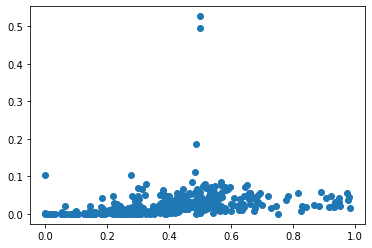

In [13]:
plt.scatter(params.insider_outsider_ratios[:,-1], params.db_indices)
plt.show()

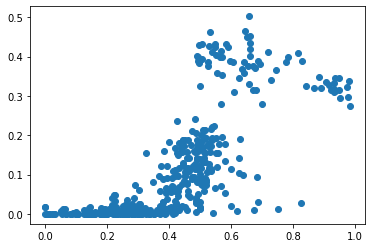

In [14]:
plt.scatter(params.insider_outsider_ratios[:,-1], params.cluster_kls)
plt.show()

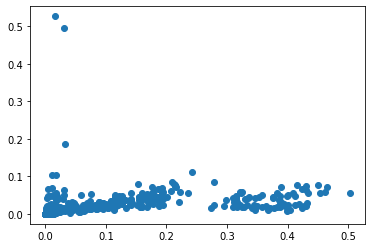

In [15]:
plt.scatter(params.cluster_kls, params.db_indices)
plt.show()

In [16]:
all_parameters = np.array(list(params.get_param_combinations()))

In [17]:
one_cluster_indices = np.where(np.isnan(params.insider_outsider_ratios[:,-1]))[0]

In [40]:
clustering_indices = np.where(~np.isnan(params.insider_outsider_ratios[:,-1]))[0]
clustering_indices_db = np.where(params.db_indices < 0.05)[0]
clustering_params_db = all_parameters[clustering_indices_db]

clustering_params = all_parameters[clustering_indices]
clustering_ratios = params.insider_outsider_ratios[clustering_indices]

In [19]:
def plot_param_histograms(conditional_params):
    fig, axs = plt.subplots(3, 2, figsize=(10,10))
    axs[0, 0].hist(conditional_params[:,0])
    axs[0,0].set_title("Number of Agents")
    axs[0, 1].hist(conditional_params[:,1])
    axs[0,1].set_title("Network Connectedness")

    axs[1, 0].hist(conditional_params[:,2])
    axs[1,0].set_title("ECB Precision")

    axs[1, 1].hist(conditional_params[:,3])
    axs[1,1].set_title("Belief Precision")

    axs[2, 0].hist(conditional_params[:,5])
    axs[2,0].set_title("Variance")

    axs[2, 1].hist(conditional_params[:,6])
    axs[2,1].set_title("Learning Rate")


Parameter configuration that leads to clustering in general


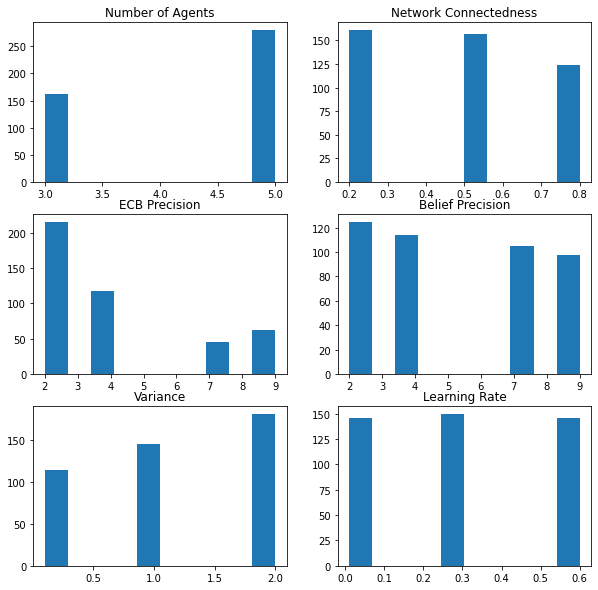

In [20]:
print("Parameter configuration that leads to clustering in general")
plot_param_histograms(clustering_params)

Parameter configuration that leads to clustering in general


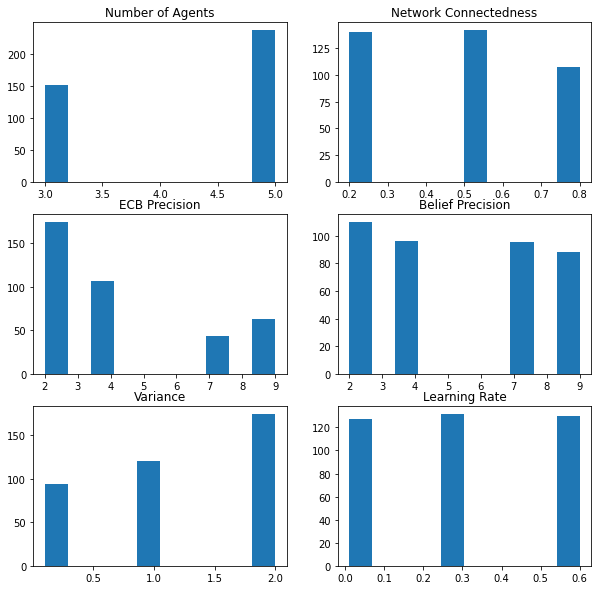

In [41]:
print("Parameter configuration that leads to clustering in general")
plot_param_histograms(clustering_params_db)
#these are the same 

In [15]:
#other interesting measures of clustering is the nonzero KL divergences, and db indices which are not 1 
#np.mean(params.db_indices[non_zero_kls])

In [21]:
print("The number of parameter configurations in which agents are able to form two discrete clusters is " + str(len(clustering_indices)))

The number of parameter configurations in which agents are able to form two discrete clusters is 442


In [36]:
insiders_dominate = np.where(clustering_ratios[:,-1] <= 0.2)[0]
insiders_params = clustering_params[insiders_dominate]
insiders_ratios = clustering_ratios[insiders_dominate]


Parameter configuration that leads to insider sampling dominating


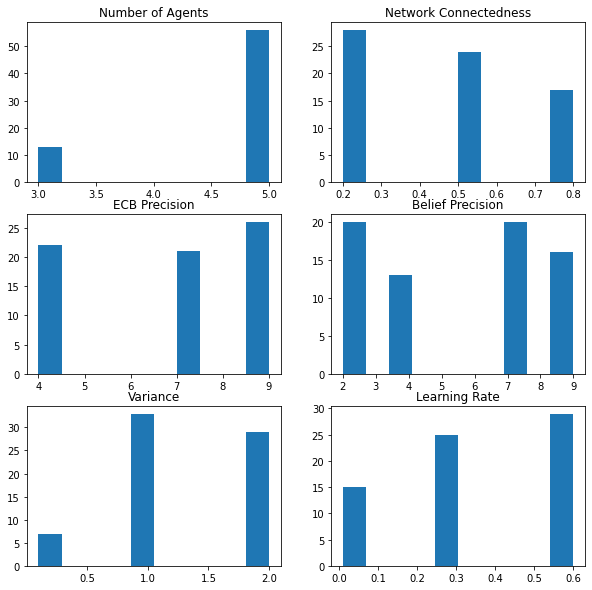

In [37]:
print("Parameter configuration that leads to insider sampling dominating")
plot_param_histograms(insiders_params)

In [42]:
print("The number of parameter configurations in which agents end up sampling insiders more than outsiders is " + str(len(insiders_dominate)))

The number of parameter configurations in which agents end up sampling insiders more than outsiders is 69


In [47]:
periodic_indices = np.where(np.absolute(clustering_ratios[:,-1] - clustering_ratios[:,0]) < 0.02)[0]
print("The number of configurations that lead to periodic sampling behaviour is " + str(len(periodic_indices)))
periodic_params = clustering_params[periodic_indices]
periodic_ratios = clustering_ratios[periodic_indices]

The number of configurations that lead to periodic sampling behaviour is 125


Parameter configuration that leads to insider sampling dominating


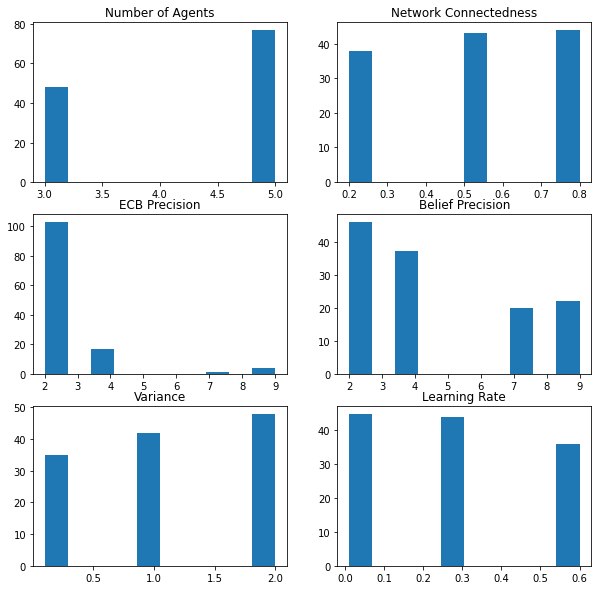

In [48]:
print("Parameter configuration that leads to insider sampling dominating")
plot_param_histograms(periodic_params)

In [55]:
biggest_insider_skew = np.where(clustering_ratios[:,0] - clustering_ratios[:,-1] > 0.02)[0]
print(len(biggest_insider_skew))
insider_skew_params = clustering_params[biggest_insider_skew]
insider_skew_ratios = clustering_ratios[biggest_insider_skew]

223


Parameter configuration that leads to insider sampling dominating


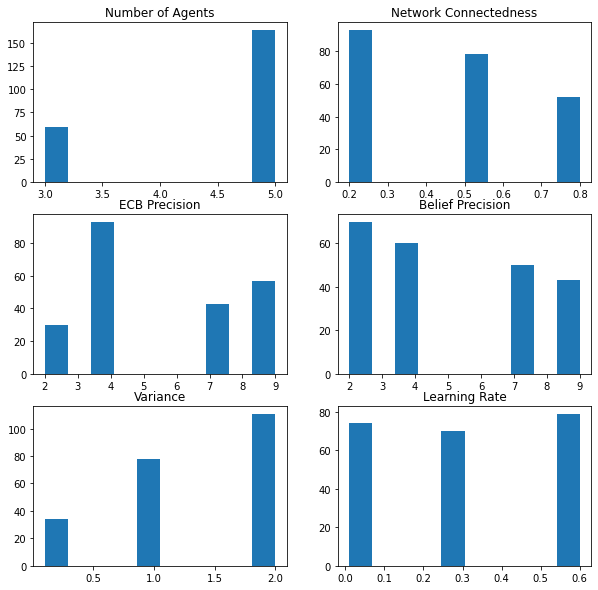

In [56]:
print("Parameter configuration that leads to insider sampling dominating")
plot_param_histograms(insider_skew_params)

[[0.49685172 0.5501545  0.57654125]
 [0.36491981 0.34213255 0.31227313]
 [0.28018697 0.24725    0.21631484]
 [0.2672783  0.27183788 0.20818301]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

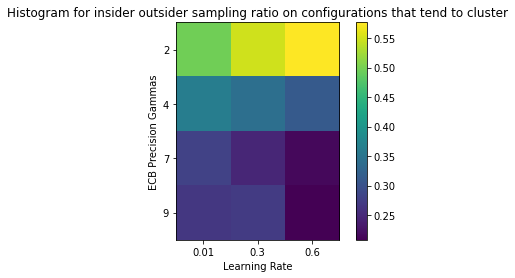

In [61]:
ecb_learning_ratio_clustering_hist = get_2d_histogram(ecb_precision_gammas, lr, clustering_params, clustering_ratios, 2, -1)
print(ecb_learning_ratio_clustering_hist)
plot_2d_histogram(ecb_learning_ratio_clustering_hist, "Learning Rate", "ECB Precision Gammas", ecb_precision_gammas, lr)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

High learning rate combined with high epistemic confirmation bias lends to the most insider sampling.

[[0.03486277 0.03565425 0.0345746 ]
 [0.03049235 0.01853344 0.01521041]
 [0.03931101 0.00614639 0.00435264]
 [0.00518139 0.00585961 0.00332314]]


Text(0.5, 1.0, 'Histogram for DB index on configurations that tend to cluster')

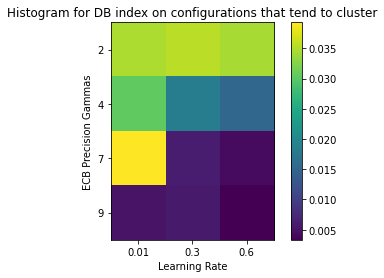

In [64]:
ecb_learning_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, lr, clustering_params, params.db_indices[clustering_indices], 2, -1)
print(ecb_learning_db_clustering_hist)
plot_2d_histogram(ecb_learning_db_clustering_hist, "Learning Rate", "ECB Precision Gammas", ecb_precision_gammas, lr)
plt.title("Histogram for DB index on configurations that tend to cluster")

Again, high ECB and high learning rate leads to the lowest DB index. 

[[0.66470971 0.49110611 0.46773165]
 [0.38027778 0.25920595 0.36708055]
 [0.31772619 0.24748246 0.20261936]
 [0.28892967 0.24098986 0.23655258]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

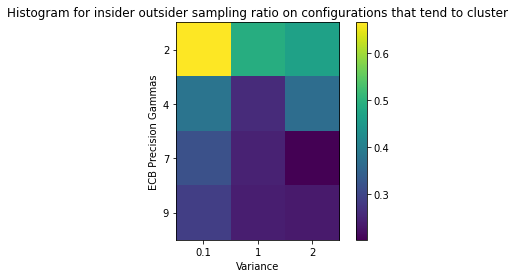

In [65]:
ecb_variance_clustering_hist = get_2d_histogram(ecb_precision_gammas, variances, clustering_params, clustering_ratios, 2, -2)
print(ecb_variance_clustering_hist)
plot_2d_histogram(ecb_variance_clustering_hist, "Variance", "ECB Precision Gammas", ecb_precision_gammas, variances)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

Here it seems that when ECB is low, having a low variance will lead to the sampling of more insiders than when variance is high, which suggests that the variance lends to some asymmetry in the sampling due to having preferences over a particular agent or a particular idea. 

[[0.48156559 0.51703588 0.56717212 0.59895636]
 [0.36696913 0.34241002 0.31153797 0.33067581]
 [0.2580131  0.28475694 0.24140625 0.14958333]
 [0.25102202 0.26687037 0.26725198 0.21574074]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

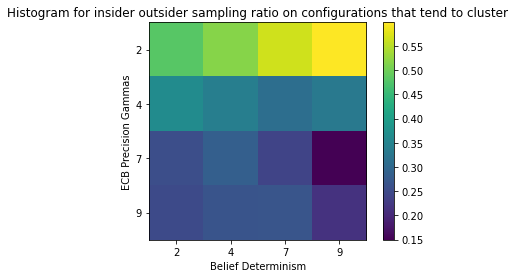

In [66]:
ecb_b_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, clustering_params, clustering_ratios, 2, 3)
print(ecb_b_clustering_hist)
plot_2d_histogram(ecb_b_clustering_hist, "Belief Determinism", "ECB Precision Gammas", ecb_precision_gammas, b_precision_gammas)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

[[       nan        nan        nan        nan]
 [0.20833333 0.184375   0.16511293 0.1044213 ]
 [0.16617284 0.17616319 0.19291667 0.12816667]
 [0.17851675 0.18012698 0.12824074 0.1489418 ]]


<ipython-input-58-22b21c64582c>:13: RuntimeWarning: Mean of empty slice
  avg_metric = np.nanmean(p2_metrics[np.isfinite(p2_metrics)])


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

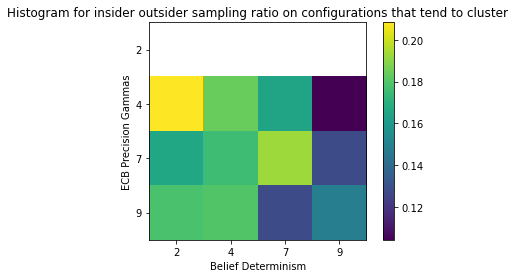

In [69]:
ecb_b_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, insiders_params, insiders_ratios, 2, 3)
print(ecb_b_clustering_hist)
plot_2d_histogram(ecb_b_clustering_hist, "Belief Determinism", "ECB Precision Gammas", ecb_precision_gammas, b_precision_gammas)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

When ECB is low, high belief determinism will actually lead to more outsider dominance.

[[0.03297086 0.03673927 0.03451732 0.03589471]
 [0.03679918 0.01636927 0.01355917 0.01692801]
 [0.00209842 0.0558457  0.00230914 0.00131179]
 [0.00400027 0.00988201 0.00240694 0.00171431]]


Text(0.5, 1.0, 'Histogram for DB index on configurations that tend to cluster')

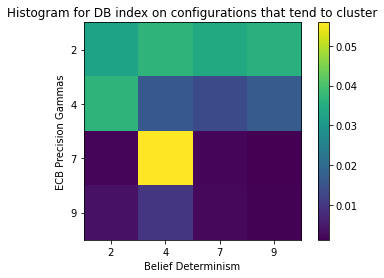

In [68]:
ecb_b_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, clustering_params, params.db_indices[clustering_indices], 2, 3)
print(ecb_b_db_clustering_hist)
plot_2d_histogram(ecb_b_db_clustering_hist, "Belief Determinism", "ECB Precision Gammas", ecb_precision_gammas, b_precision_gammas)
plt.title("Histogram for DB index on configurations that tend to cluster")

In [58]:
#I want to take the outsider sampling frequency and plot a histogram across belief precision and learning rate for the clustering data 

def get_2d_histogram(param1, param2, conditional_parameters, conditional_metric, param1_index, param2_index):
    hist = np.zeros((len(param1), len(param2)))
    for i, e in enumerate(param1):
        indices = np.where(conditional_parameters[:,param1_index] == e)[0]
        _params = conditional_parameters[indices]
        metrics = conditional_metric[indices]
        for j, l in enumerate(param2):
            p2_indices = np.where(_params[:,param2_index]==l)[0]
            p2_params = _params[p2_indices]
            p2_metrics = metrics[p2_indices]
            avg_metric = np.nanmean(p2_metrics[np.isfinite(p2_metrics)])
            hist[i,j] = avg_metric
    return hist

def plot_2d_histogram(hist, x_label, y_label, param1, param2):

    plt.imshow(hist)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = plt.gca()
    ax.set_xticks(np.arange(0,len(param2),1))
    ax.set_yticks(np.arange(0,len(param1),1))
    ax.set_xticklabels(param2)
    ax.set_yticklabels(param1)
    plt.colorbar()
    #    list_of_outsider_metrics = np.where(clustering_ratios

In [229]:
lr

[0.01, 0.3, 0.6]

In [28]:
%config InlineBackend.figure_format = 'svg'


In [217]:
def similarity_matrix(belief_hist):
    T = belief_hist.shape[0]

    KLD_intra_beliefs = get_KLDs(belief_hist)
    believers = np.where(belief_hist[-1,0,:] > 0.5)
    nonbelievers = np.where(belief_hist[-1,0,:] < 0.5)
    cluster_sorted_indices = [i for i in believers[0]]
    for j in nonbelievers[0]:
        cluster_sorted_indices.append(j)

    
    color_map = plt.cm.get_cmap('gray').reversed()


    single_slice = KLD_intra_beliefs[:,:,-1]
    sorted_slice = single_slice[cluster_sorted_indices,:][:,cluster_sorted_indices]
    plt.imshow(sorted_slice, cmap = color_map)
    plt.title("Belief similarity matrix")
    plt.show()
    plt.clf()

In [224]:

#num agents, connectedness, ecb precision, env precision, b precision, lr, variance 
optimal_params = clustering_params[-1]
params.update_params(optimal_params)
params.get_all_sim_results_from_parameters()
beliefs = params.all_qs

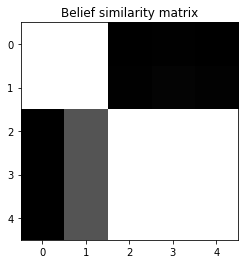

<Figure size 432x288 with 0 Axes>

In [225]:
kld_matrices = similarity_matrix(beliefs[2])

In [24]:
def get_agent_data(agent, result, cluster1, cluster2):
    agent_adj_mat = result['adj_mat'][:,agent,:]
    agent_beliefs = result['all_qs'][:,:,:,agent]
    agent_samplings = result['all_neighbour_sampling'][:,:,agent]
    agent_tweets = result['all_tweets'][:,:,agent]
    agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
    other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
    neighbours = list(is_connected(agent_adj_mat[0])[0])
    outsider_neighbours = np.intersect1d(neighbours, other_cluster)
    insider_neighbours = np.intersect1d(neighbours, agent_cluster)
    
    agent_data = (agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours)
    return agent_data

def find_one_agent_two_neighbours_opposite_cluster(parameters, condition = True, trial = None, agent = None):
    params.update_params(parameters)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()
    if condition == True:
        for trial in range(30):
                #what are the clusters? 
            all_beliefs_t = beliefs[trial]
            cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
            cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
            for agent in range(parameters[0]):
                agent_data = get_agent_data(agent,result, cluster1, cluster2)
                if len(agent_data[-3]) == 2 and len(agent_data[-2]) == 1 and len(agent_data[-1]) == 1:
                    print("Found condition!")
                    print(cluster1)
                    print(cluster2)
                    return result, trial, agent, cluster1, cluster2, agent_data
    else:
        all_beliefs_t = beliefs[trial,:,:,:] 
        cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
        cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
        agent_data = get_agent_data(agent,result, cluster1, cluster2)
                    
        return result, trial, agent, cluster1, cluster2, agent_data
            

In [25]:
def is_connected(adj_mat):
    return np.where(adj_mat == 1)

In [426]:
test_params = all_params[1]
params.update_params(test_params)
beliefs = params.all_qs


In [344]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params)

Found condition!
(array([0, 3, 4]),)
(array([1, 2]),)


In [439]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params, False, 4, 0)

In [440]:
trial

4

In [441]:
(agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours) = agent_data

In [442]:
agent_samplings[trial]

array([1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
       1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2.,
       1., 1., 2., 1., 1., 2., 1., 1., 2., 1.])

In [443]:
outsider_indices = [np.where(agent_samplings[trial] == i) for i in outsider_neighbours]
insider_indices = [np.where(agent_samplings[trial] == i) for i in insider_neighbours]

In [444]:
insider_indices

[(array([ 0,  1,  3,  4,  6,  7,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
         22, 24, 25, 27, 28, 30, 31, 33, 34, 36, 37, 39, 40, 42, 43, 45, 46,
         48, 49, 51, 52, 54, 55, 57, 58, 60]),)]

In [55]:
def sampling_data(all_sampling_data, idx, parameters, all_qs, adj_mat, all_samplings):
    all_sampling_data[idx] = {}
    for trial in range(30):
        #print()
        #print("trial: "  + str(trial))
            #what are the clusters? 
        cluster1 = np.where(all_qs[trial][-1,1,:] > 0.5)
        cluster2 = np.where(all_qs[trial][-1,1,:] < 0.5)
        if len(cluster1[0]) > 0 and len(cluster2[0]) > 0:
            all_sampling_data[idx][trial] = {}

            for agent in range(parameters[0]):
                #print("Agent: " + str(agent))
                agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
                other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
                try:
                    neighbours = list(np.where(adj_mat[:,agent,:][0] ==1)[0])
                except:
                    print(agent)
                    print(adj_mat.shape)
                    print(p)
                outsider_neighbours = np.intersect1d(neighbours, other_cluster)
                insider_neighbours = np.intersect1d(neighbours, agent_cluster)
                if len(outsider_neighbours) > 0 and len(insider_neighbours) > 0:
                    agent_samplings = all_samplings[:,:,agent][trial]
                    outsider_indices = [np.where(agent_samplings == i) for i in outsider_neighbours]
                    insider_indices = [np.where(agent_samplings == i) for i in insider_neighbours]
                    all_sampling_data[idx][trial][agent] = {}
                    for j in range(len(outsider_indices)):
                        #outsider_freq = [outsider_indices[j][0][i+1]-outsider_indices[j][0][i] for i in range(len(outsider_indices[j][0])-1)]
                        #print("outsider frequency: " + str(outsider_freq))
                        all_sampling_data[idx][trial][agent]["outsider_indices"] = []
                        all_sampling_data[idx][trial][agent]["outsider_indices"].append(outsider_indices[j][0])
                        all_sampling_data[idx][trial][agent]["outsider_neighbours"] = outsider_neighbours

                    for k in range(len(insider_indices)):
                        #insider_freq = [insider_indices[k][0][i+1]-insider_indices[k][0][i] for i in range(len(insider_indices[k][0])-1)]
                        #print("insider frequency: " + str(insider_freq))
                        all_sampling_data[idx][trial][agent]["insider_indices"] = []
                        all_sampling_data[idx][trial][agent]["insider_indices"].append(insider_indices[k][0])
                        all_sampling_data[idx][trial][agent]["insider_neighbours"] = insider_neighbours

    return all_sampling_data

        

In [501]:
params

In [27]:
all_params = list(params.get_param_combinations())
all_sampling_data = {}
for idx, p in enumerate(all_params):
    params.update_params(p)
    params.get_all_sim_results_from_parameters()
    all_sampling_data = sampling_data(all_sampling_data, idx, p, params.all_qs, params.adj_mat, params.all_neighbour_samplings)


In [22]:
x = all_params.index(tuple(optimal_params))

In [23]:
x

30

In [34]:
outsider_indices = all_sampling_data[x][10][2]["outsider_indices"]
insider_indices = all_sampling_data[x][10][2]["insider_indices"]
outsider_neighbours = all_sampling_data[x][10][2]["outsider_neighbours"]
insider_neighbours = all_sampling_data[x][10][2]["insider_neighbours"]


In [68]:
#plt.plot(range(61), agent_samplings[trial])
def plot_samples(outsider_indices, insider_indices, outsider_neighbours, insider_neighbours):
    if len(outsider_indices) > 0:
        for j in range(len(outsider_indices)):
            plt.scatter(outsider_indices[j], np.tile(0, len(outsider_indices[j])), color = 'green', label = "outsider")
    for i in range(len(insider_indices)):
        plt.scatter(insider_indices[i], np.tile(1, len(insider_indices[i])), color = 'orange', label = "insider")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Agent Sampling")
    plt.title("Sampling Behaviour")

In [328]:
agent_reads = [result['all_tweets'][trial,t,int(a)] for t,a in enumerate(agent_samplings[trial,:])]

In [ ]:
#average number of outsider samplings per agent at the final 20 timesteps 
#average over agents and trial 
#2d heat map of the ratios over beleif precision / learning rate / ecb precision 


#for just ecb precision could just have curves over time and y being the frequency sampling ratio 

#tensor of parameters (ecb, belief, learning rate) and then each entry is the average for fixed parameter respectively
#plt.imshow on a slice of that cube 


In [335]:
behaviour = [( agent_tweets[trial][t], agent_reads[t], agent_beliefs[trial,:,0][t], (agent_beliefs[trial,:,0][t] - agent_beliefs[trial,:,0][t-1] )) for t in range(1,len(agent_reads)-1)]

So two general behaviours are possible: Either an agent will form a conclusion by choosing to more frequently sample within one cluster group than the other, or they will continue to sample from both cluster groups and remain centrist. In both cases, agents will choose their own leaning - only to tweet one hashtag over the other, but will continue to sample both leanings, to varying frequencies based on their beliefs.  

Text(0.5, 1.0, 'Effect of Belief Precision on Sampling Frequency')

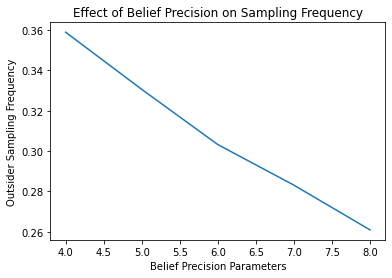

In [113]:
plt.plot(b_precision_gammas[1:], sampling_data[1:])
plt.xlabel("Belief Precision Parameters")
plt.ylabel("Outsider Sampling Frequency")
plt.title("Effect of Belief Precision on Sampling Frequency")